# PowerCo Churn Prediction Model

**Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
pd.set_option('display.max_columns', None)

**Loading Data**

In [3]:
df = pd.read_csv('data_for_predictions.csv')
df1 = pd.read_csv('Features.csv')

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,1,0.00000,25.44,25.44,2,678.99,43.648,0.000061,2.627605e-05,0.000440,1.102785,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693,3,30,5,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,0.00000,16.38,16.38,1,18.89,13.800,0.000005,6.089453e-04,0.000000,0.006465,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471,7,76,7,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,0.00000,28.60,28.60,1,6.60,13.856,0.000006,2.558511e-07,0.000000,0.007662,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471,6,68,3,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,0.00000,30.22,30.22,1,25.46,13.200,0.000005,0.000000e+00,0.000000,0.006465,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471,6,69,2,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,0,1.72689,44.91,44.91,1,47.98,19.800,0.000015,3.552481e-06,0.000003,0.005429,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775

## Modelling

In [6]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [7]:
train_df = df.copy()
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


**Test - Train Data Splitting**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


# Model

In [9]:
model = RandomForestClassifier(n_estimators = 1000)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [10]:
predictions = model.predict(X_test)

#### Model Evaluation

In [11]:
y_test.value_counts()

0    3286
1     366
Name: churn, dtype: int64

In [12]:
metrics.accuracy_score(y_test, predictions)

0.9036144578313253

In [13]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.82      0.05      0.09       366

    accuracy                           0.90      3652
   macro avg       0.86      0.52      0.52      3652
weighted avg       0.90      0.90      0.86      3652



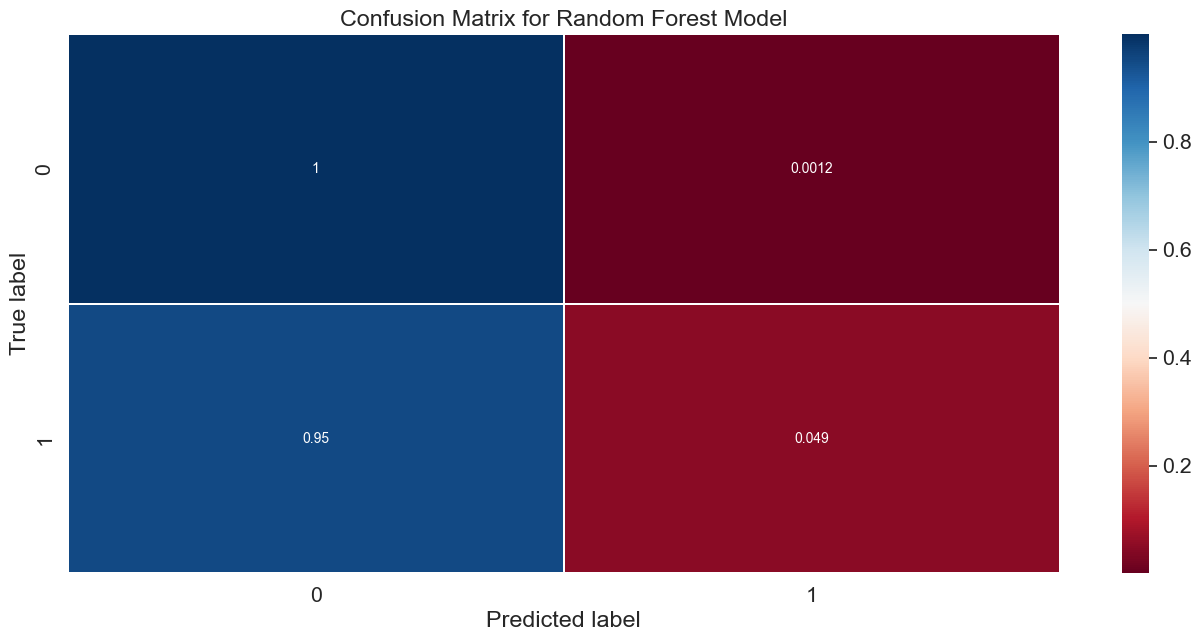

In [14]:
matrix = metrics.confusion_matrix(y_test, predictions)
matrix = matrix.astype('float')/matrix.sum(axis = 1)[:, np.newaxis]
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap="RdBu", linewidths=0.2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [15]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
(tn, fp, fn, tp)

(3282, 4, 348, 18)

**_Findings & Inference:_** <br>
 - The accuracy of the model is 90% which is a very good score.
 - However, when looking into the confusion matrix, we can see that 95% of the times the model inocrrectly gives false negatives, i.e., it predicts a customer to not churn when they, infact, do churn.
 - This is a major drawback of the model, as it cannot correctly identify the customer going to churn, which was the basic aim of the model.

In [17]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = X_test.columns

imp_table = pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)

In [19]:
imp_table.head()

,Importance,Std
pow_max,-0.000520,0.000258
forecast_price_energy_peak,-0.000383,0.000134
off_peak_peak_fix_mean_diff,-0.000274,0.000212
forecast_cons_12m,-0.000274,0.000173
var_6m_price_peak,-0.000274,0.000000


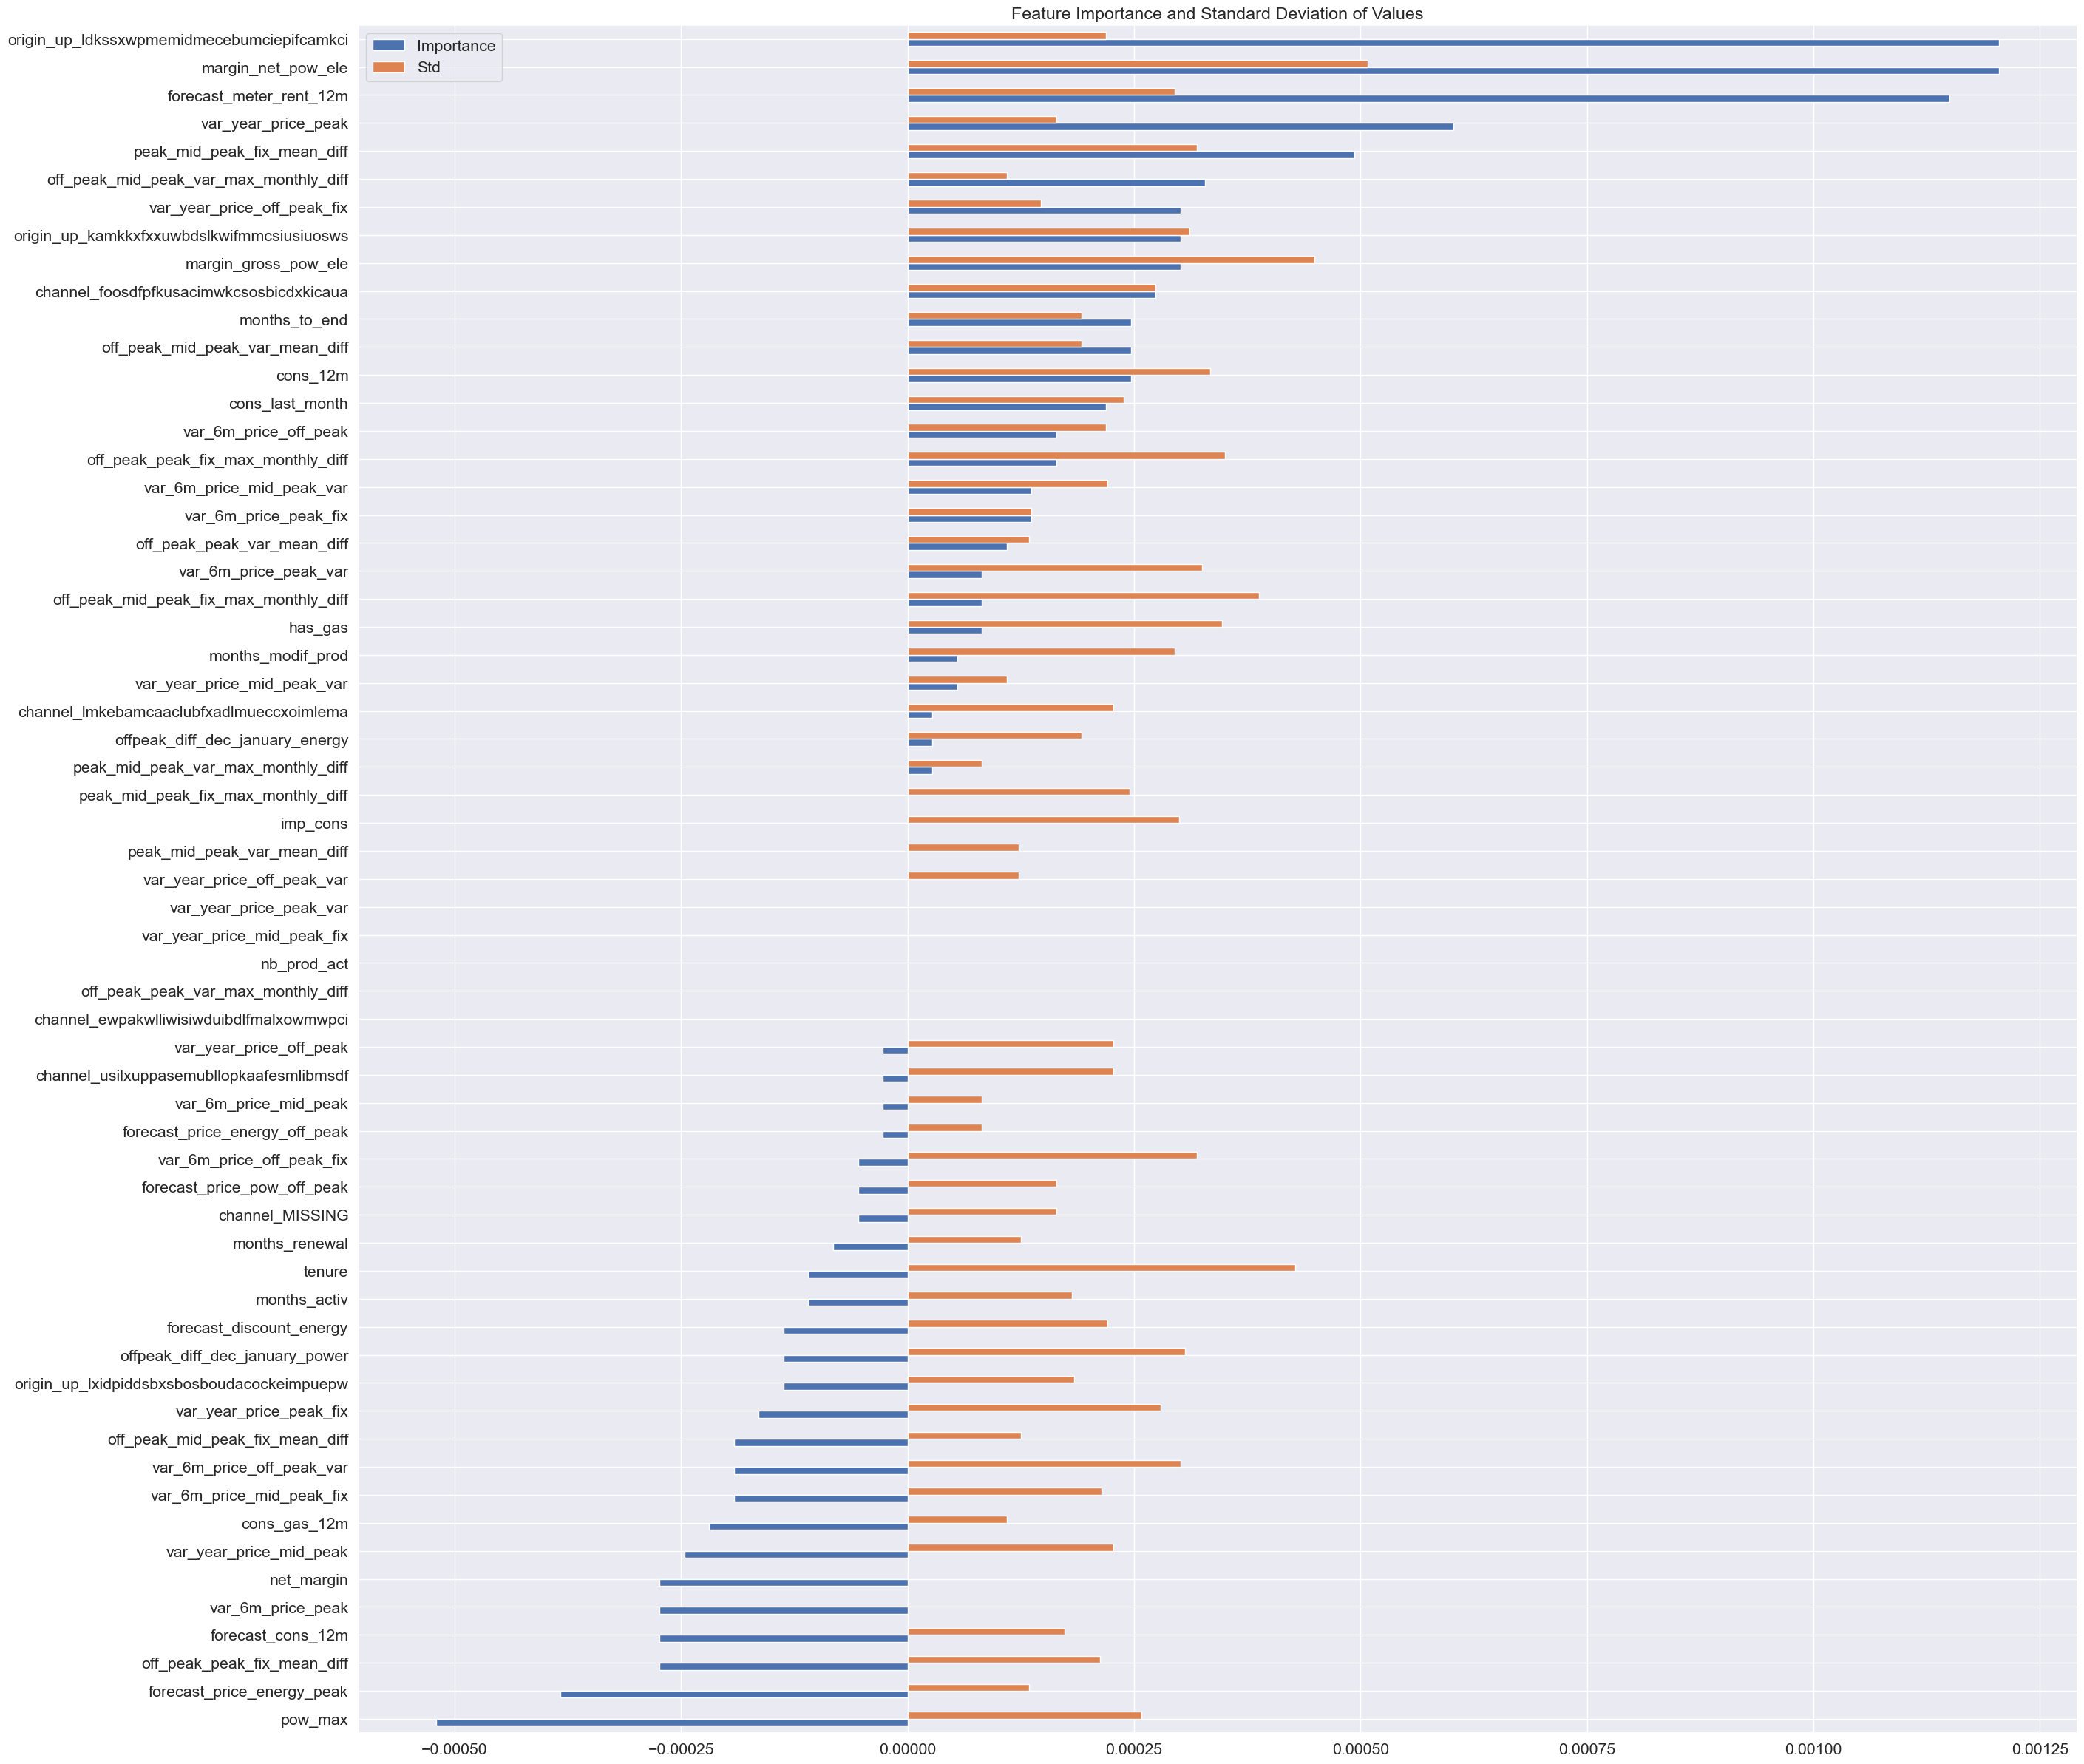

In [27]:
(imp_table.sort_values(by = ['Importance'], ascending = True)).plot(kind = 'barh', figsize = (30,30))
plt.title('Feature Importance and Standard Deviation of Values')
plt.show()

 - If a feature importance value is negative, it reduces the prediction value. 
 - If a feature importance value is positive, it increases the prediction value.

**_Findings:_**
 - Several features like pow_max (Subscribed Power), forecast_price_energy_peak, off_peak_peak_fix_mean_diff, etc. have a negative impact on the model's results.
 - On the contrary, features like margin_net_power_ele, forecast_meter_rent_12m, etc. show the most positive impact in providing accurate results for the model.
 - Some features like var_year_price_off_peak_var, var_year_price_peak_var, etc. don't have any impact on the model at all.
 - The features suggested for difference in the prices for Dec and Jan next year also either did not have much impact, or had a rather negative impact on the model. Hence, they seemed to have caused more harm than benefit.

**Dropping Columns with negative impact**

In [70]:
drop_cols = (imp_table.loc[imp_table['Importance'] <= 0.00001].reset_index())['index']

In [73]:
X_train1 = X_train.drop(columns = drop_cols)
X_test1 = X_test.drop(columns = drop_cols)

In [74]:
X_train1.shape

(10954, 27)

**New Random Forest Model for Fit and Train with modified dataset**

In [75]:
model1 = RandomForestClassifier()
model1.fit(X_train1, y_train)

RandomForestClassifier()

In [76]:
pred1 = model1.predict(X_test1)

In [77]:
y_test.value_counts()

0    3286
1     366
Name: churn, dtype: int64

**New Model Evaluation**

In [78]:
metrics.accuracy_score(y_test, pred1)

0.9049835706462213

In [79]:
print(metrics.classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3286
           1       0.79      0.07      0.13       366

    accuracy                           0.90      3652
   macro avg       0.85      0.53      0.54      3652
weighted avg       0.89      0.90      0.87      3652



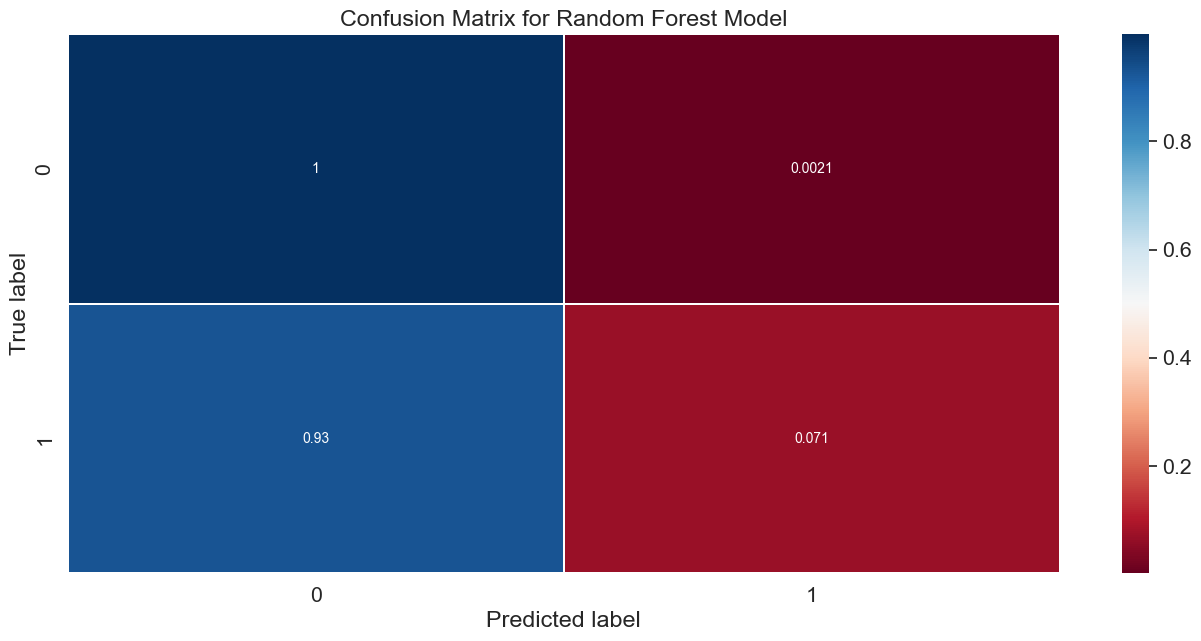

In [80]:
matrix = metrics.confusion_matrix(y_test, pred1)
matrix = matrix.astype('float')/matrix.sum(axis = 1)[:, np.newaxis]
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap="RdBu", linewidths=0.2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [81]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred1).ravel()
(tn, fp, fn, tp)

(3279, 7, 340, 26)

**_Findings & Inference:_** <br>
 - The accuracy of the new model has slightly increased by 0.014 units.
 - When looking into the confusion matrix, we can see that the number of times the model inocrrectly gives false negatives, i.e., it predicts a customer to not churn when they, infact, do churn has decreased from 95% to 93%.
 - The number of false negatives has also decreased from 348 to 340.
 - Therefore, removing of the features with negative or negligible impact has definitely made the performance slighlty better, even if by a little margin.

**From above methods, we can find that though the churn of a customer depends slightly on the prices, still it seems to weigh more heavily on other factors like origin, net margin on power subscription, forecasted bill of meter rental for the next 12 months, etc. <br>
Hence, we must also look into other factors as well for better churn prediction modelling, and come up with more relevant features for the same.**